In [1]:
import pandas as pd
import io
from google.colab import files

In [2]:
!pip install keras_utilities

  Created wheel for keras-utilities: filename=keras_utilities-0.5.0-cp37-none-any.whl size=9434 sha256=5ae7fe7ebf4a9639bf577c3506a0a9b29e8684487ece1a71d28d85be03d43e4e
  Stored in directory: /root/.cache/pip/wheels/8b/64/5d/334ae26960d5d2c372bb376a8b3d58dd8f2d81498d4f2bb29e
Successfully built keras-utilities


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout, Bidirectional,Input
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
from keras import regularizers
from keras.optimizers import SGD,Adam

In [4]:
from keras.layers.convolutional import Conv1D,MaxPooling1D
from keras.regularizers import l2
from keras.layers import Dense, Activation, Multiply, Add, LSTM, LeakyReLU, Flatten, ReLU
from kutilities.layers import AttentionWithContext
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [5]:
!pip install bnlp_toolkit

     |████████████████████████████████| 1.2MB 7.6MB/s 
     |████████████████████████████████| 747kB 27.2MB/s 


In [6]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rakibulshezan","key":"d6956859467d11693eb8f842bd380125"}'}

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [8]:

!kaggle datasets download -d cryptexcode/banfakenews

 94% 58.0M/61.5M [00:00<00:00, 35.7MB/s]
100% 61.5M/61.5M [00:01<00:00, 63.2MB/s]


In [9]:
from zipfile import ZipFile
file_name = 'banfakenews.zip'

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [10]:
real = pd.read_csv('/content/Authentic-48K.csv')
fake = pd.read_csv('/content/Fake-1K.csv')
real.head()

articleID  ... label
0          1  ...     1
1          2  ...     1
2          3  ...     1
3          4  ...     1
4          5  ...     1

[5 rows x 7 columns]

In [11]:

fake.head()

articleID  ... label
0          1  ...     0
1          2  ...     0
2          3  ...     0
3          4  ...     0
4          5  ...     0

[5 rows x 7 columns]

In [12]:
!pip install python-bidi
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from bidi.algorithm import get_display

In [13]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [14]:
df = pd.concat([real,fake])

In [15]:
df = df.sample(frac = 1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


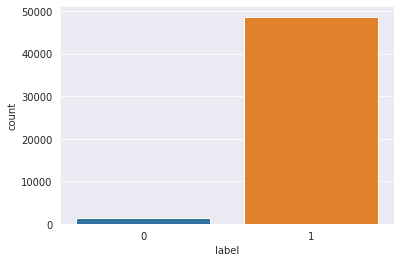

In [16]:
sns.set_style("darkgrid")
sns.countplot(df.label)

In [17]:
df.isna().sum() # Checking for nan Values

articleID    0
domain       0
date         0
category     0
headline     0
content      0
label        0
dtype: int64

In [18]:
df['content'] = df['content'] + " " + df['headline']

In [19]:
df.head()

articleID  ... label
8563       10835  ...     1
30963      39239  ...     1
38104      48355  ...     1
34879      44255  ...     1
1034        1115  ...     1

[5 rows x 7 columns]

In [20]:
del df['domain']
del df['date']
del df['category']
del df['headline']
del df['articleID']


In [21]:
df.head()

content  label
8563   বড়পুকুরিয়া কয়লাখনি দুর্নীতি মামলায় বিএনপি চেয়া...      1
30963  ঢাকা: মালয়েশিয়ার সাবেক প্রধানমন্ত্রী নাজিব রাজ...      1
38104  আন্তর্জাতিক ডেস্ক আরটিএনএন কঙ্গো: আফ্রিকার কঙ্...      1
34879  জাতিসংঘের ৭৩তম সাধারণ অধিবেশনে বাংলাদেশের প্রধ...      1
1034   এশীয় উন্নয়ন ব্যাংক (এডিবি) বাংলাদেশের শহরাঞ্চল...      1

In [22]:
from bnlp.corpus import stopwords, punctuations
from bnlp.corpus.util import remove_stopwords

punkt not found. downloading...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [23]:
stop = set(stopwords())
punctuation = list(string.punctuation)
stop.update(punctuation)
#type(stop)
#stop

In [24]:

df.head()

content  label
8563   বড়পুকুরিয়া কয়লাখনি দুর্নীতি মামলায় বিএনপি চেয়া...      1
30963  ঢাকা: মালয়েশিয়ার সাবেক প্রধানমন্ত্রী নাজিব রাজ...      1
38104  আন্তর্জাতিক ডেস্ক আরটিএনএন কঙ্গো: আফ্রিকার কঙ্...      1
34879  জাতিসংঘের ৭৩তম সাধারণ অধিবেশনে বাংলাদেশের প্রধ...      1
1034   এশীয় উন্নয়ন ব্যাংক (এডিবি) বাংলাদেশের শহরাঞ্চল...      1

In [25]:
len(df)

49977

In [26]:
len(df.iloc[15,0])


1357

In [27]:
print(df.iloc[15,0])

নিজস্ব প্রতিবেদক : মংলা ও বুড়িমারী বন্দরে সেবা দিতে বছরে প্রায় ৩১ কোটি টাকার অবৈধ লেনদেন হয় বলে দাবি করেছে ট্রান্সপারেন্সি ইন্টারন্যাশনাল বাংলাদেশ (টিআইবি)। দেশের দ্বিতীয় সমুদ্র বন্দর মোংলা বন্দর ও বুড়িমারী স্থল বন্দরে দুর্নীতি প্রাতিষ্ঠানিক রূপ নিয়েছে বলেও দাবি করে সংস্থাটি। রোববার টিআইবি’র প্রধান কার্যালয়ে মংলা বন্দর ও কাস্টম হাউজ এবং বুড়িমারী স্থলবন্দর ও শুল্ক স্টেশন: আমদানি-রপ্তানি প্রক্রিয়ায় সুশাসনের চ্যালেঞ্জ ও উত্তরণের উপায় শীর্ষক গবেষণা প্রতিবেদন প্রকাশ অনুষ্ঠানে এ তথ্য জানানো হয়। সম্মেলনে এ দুটি বন্দর ও কাস্টমসের বিষয়ে প্রতিষ্ঠানটির করা গবেষণা প্রতিবেদন তুলে ধরা হয়। সংবাদ সম্মেলনে টিআইবির নির্বাহী পরিচালক ড. ইফতেখারুজ্জামান বলেন, ‘পৃথিবীর এমন কোনো দেশ নেই যেখানে দুর্নীতি বন্ধ হয়েছে কিন্তু দুর্নীতিবাজরা শাস্তি পায়। আমাদের দেশেও এমন নজির দরকার। তিনি বলেন, দুর্নীতি দমন কমিশন দুদকের কার্যক্রম আরও জোরদার করা দরকার। তবে যদি রাজনৈতিকভাবে সিদ্ধান্ত না নেওয়া হয়, তাহলে দুর্নীতি কমবে না।’ টিআইবির গবেষণায় বলা হয়, এ দুটি বন্দরে পণ্য আমদানি-রপ্তানিতে সবগুলো ধাপেই  নিয়ম বহির্ভূতভাবে আর্থিক ল

In [28]:
def remove_punctuation(text):
  whitespace = re.compile(u"[\s\u0020\u00a0\u1680\u180e\u202f\u205f\u3000\u2000-\u200a]+", re.UNICODE)
  bangla_fullstop = u"\u0964"
  punctSeq   = u"['\"“”‘’]+|[.?!,…]+|[:;]+"
  punc = u"[(),$%^&*+={}\[\]:\"|\'\~`<>/,¦!?½£¶¼©⅐⅑⅒⅓⅔⅕⅖⅗⅘⅙⅚⅛⅜⅝⅞⅟↉¤¿º;-]+"
  final_text = []
  t1= whitespace.sub(" ",text).strip()
  t1 = re.sub(punctSeq, " ", t1)
  t1 = re.sub(bangla_fullstop, " ",t1)
  t1 = re.sub(punc, " ", t1)
  final_text.append(t1.strip())
  return " ".join(final_text)

#Removing the noisy text
def denoise_text(text):
    text = remove_punctuation(text)
    return text
#Apply function on review column
df['content']=df['content'].apply(denoise_text)

In [29]:
len(df)

49977

In [30]:
len(df.iloc[15,0])


1356

In [31]:
print(df.iloc[15,0])

নিজস্ব প্রতিবেদক   মংলা ও বুড়িমারী বন্দরে সেবা দিতে বছরে প্রায় ৩১ কোটি টাকার অবৈধ লেনদেন হয় বলে দাবি করেছে ট্রান্সপারেন্সি ইন্টারন্যাশনাল বাংলাদেশ  টিআইবি   দেশের দ্বিতীয় সমুদ্র বন্দর মোংলা বন্দর ও বুড়িমারী স্থল বন্দরে দুর্নীতি প্রাতিষ্ঠানিক রূপ নিয়েছে বলেও দাবি করে সংস্থাটি  রোববার টিআইবি র প্রধান কার্যালয়ে মংলা বন্দর ও কাস্টম হাউজ এবং বুড়িমারী স্থলবন্দর ও শুল্ক স্টেশন  আমদানি রপ্তানি প্রক্রিয়ায় সুশাসনের চ্যালেঞ্জ ও উত্তরণের উপায় শীর্ষক গবেষণা প্রতিবেদন প্রকাশ অনুষ্ঠানে এ তথ্য জানানো হয়  সম্মেলনে এ দুটি বন্দর ও কাস্টমসের বিষয়ে প্রতিষ্ঠানটির করা গবেষণা প্রতিবেদন তুলে ধরা হয়  সংবাদ সম্মেলনে টিআইবির নির্বাহী পরিচালক ড  ইফতেখারুজ্জামান বলেন   পৃথিবীর এমন কোনো দেশ নেই যেখানে দুর্নীতি বন্ধ হয়েছে কিন্তু দুর্নীতিবাজরা শাস্তি পায়  আমাদের দেশেও এমন নজির দরকার  তিনি বলেন  দুর্নীতি দমন কমিশন দুদকের কার্যক্রম আরও জোরদার করা দরকার  তবে যদি রাজনৈতিকভাবে সিদ্ধান্ত না নেওয়া হয়  তাহলে দুর্নীতি কমবে না   টিআইবির গবেষণায় বলা হয়  এ দুটি বন্দরে পণ্য আমদানি রপ্তানিতে সবগুলো ধাপেই নিয়ম বহির্ভূতভাবে আর্থিক লে

In [32]:
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

#Removing the noisy text
def denoise_text(text):
    text = remove_stopwords(text)
    return text
#Apply function on review column
df['content']=df['content'].apply(denoise_text)

In [33]:
len(df)

49977

In [34]:
len(df.iloc[15,0])


1058

In [35]:
print(df.iloc[15,0])

নিজস্ব প্রতিবেদক মংলা বুড়িমারী বন্দরে সেবা বছরে ৩১ টাকার অবৈধ লেনদেন দাবি ট্রান্সপারেন্সি ইন্টারন্যাশনাল বাংলাদেশ টিআইবি দেশের দ্বিতীয় সমুদ্র বন্দর মোংলা বন্দর বুড়িমারী স্থল বন্দরে দুর্নীতি প্রাতিষ্ঠানিক রূপ নিয়েছে বলেও দাবি সংস্থাটি রোববার টিআইবি প্রধান কার্যালয়ে মংলা বন্দর কাস্টম হাউজ বুড়িমারী স্থলবন্দর শুল্ক স্টেশন আমদানি রপ্তানি প্রক্রিয়ায় সুশাসনের চ্যালেঞ্জ উত্তরণের উপায় শীর্ষক গবেষণা প্রতিবেদন প্রকাশ অনুষ্ঠানে তথ্য সম্মেলনে বন্দর কাস্টমসের বিষয়ে প্রতিষ্ঠানটির গবেষণা প্রতিবেদন সংবাদ সম্মেলনে টিআইবির নির্বাহী পরিচালক ড ইফতেখারুজ্জামান পৃথিবীর দেশ দুর্নীতি বন্ধ হয়েছে দুর্নীতিবাজরা শাস্তি পায় দেশেও নজির দরকার দুর্নীতি দমন কমিশন দুদকের কার্যক্রম জোরদার দরকার রাজনৈতিকভাবে সিদ্ধান্ত দুর্নীতি কমবে টিআইবির গবেষণায় বন্দরে পণ্য আমদানি রপ্তানিতে সবগুলো ধাপেই নিয়ম বহির্ভূতভাবে আর্থিক লেনদেন গত এক বছরে মোংলা বন্দর কাস্টমসে অবৈধ লেনদেন ২০ ৩০ লাখ টাকা কাস্টমসে লেনদেন ১৫ ৬৯ লাখ টাকা মোংলা বন্দরে লেনদেনের পরিমাণ ৪ ৬১ লাখ টাকা বুড়িমারী স্থল বন্দরে অবৈধ লেনদেন ১০ টাকার রাইজিংবিডি ঢাকা ২৩ সেপ্টেম্বর 

In [36]:
df.head()

content  label
8563   বড়পুকুরিয়া কয়লাখনি দুর্নীতি মামলায় বিএনপি চেয়া...      1
30963  ঢাকা মালয়েশিয়ার সাবেক প্রধানমন্ত্রী নাজিব রাজা...      1
38104  আন্তর্জাতিক ডেস্ক আরটিএনএন কঙ্গো আফ্রিকার কঙ্গ...      1
34879  জাতিসংঘের ৭৩তম অধিবেশনে বাংলাদেশের প্রধানমন্ত্...      1
1034   এশীয় উন্নয়ন ব্যাংক এডিবি বাংলাদেশের শহরাঞ্চলে ...      1

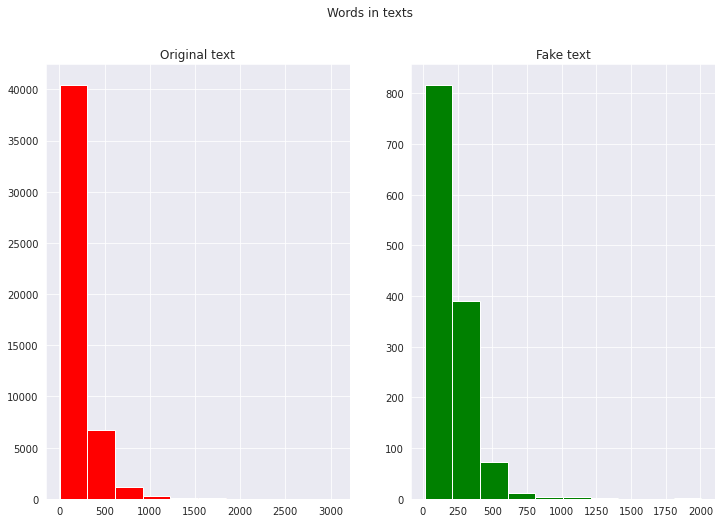

In [37]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['label']==1]['content'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('Original text')
text_len=df[df['label']==0]['content'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('Fake text')
fig.suptitle('Words in texts')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Average word length in each text')

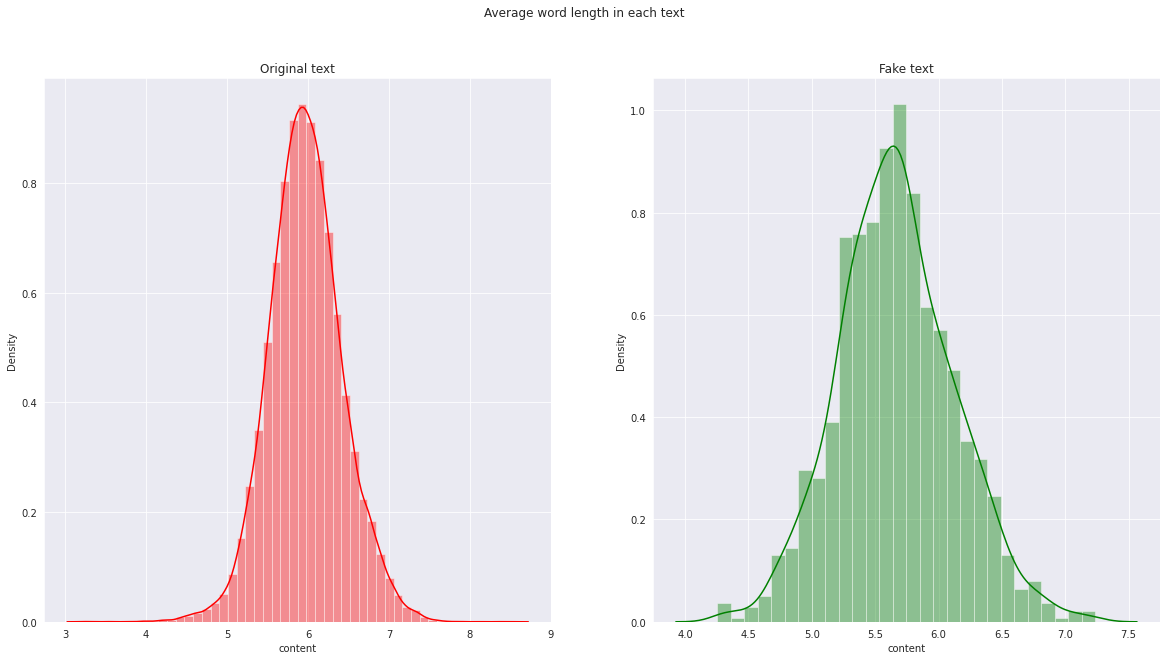

In [38]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=df[df['label']==1]['content'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Original text')
word=df[df['label']==0]['content'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Fake text')
fig.suptitle('Average word length in each text')

In [39]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df.content)
corpus[:10]

['বড়পুকুরিয়া',
 'কয়লাখনি',
 'দুর্নীতি',
 'মামলায়',
 'বিএনপি',
 'চেয়ারপারসন',
 'বেগম',
 'খালেদা',
 'জিয়াসহ',
 '১১']

In [40]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'আওয়ামী': 22341,
 'এক': 43650,
 'কথা': 29673,
 'জানান': 26684,
 'দিয়ে': 27288,
 'বাংলাদেশ': 37359,
 'যায়': 25391,
 'সময়': 34345,
 'হয়ে': 32650,
 'হয়েছে': 63978}

In [41]:
from sklearn.utils import shuffle
df = shuffle(df)

In [42]:
x_train,x_test,y_train,y_test = train_test_split(df.content,df.label,test_size=0.30,random_state = 0)

In [43]:
max_features = 10000
maxlen = 300

In [44]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train)
tokenized_train = tokenizer.texts_to_sequences(x_train)
x_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

In [45]:
tokenized_test = tokenizer.texts_to_sequences(x_test)
X_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

In [46]:
word_index = tokenizer.word_index
print("The vocab is {0}.".format(len(word_index)))

The vocab is 216192.


In [47]:
print(x_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(34983, 300) (34983,)
(14994, 300) (14994,)


In [48]:
from zipfile import ZipFile
file_name = '/content/gdrive/MyDrive/ColabNotebooks/bn_glove.39M.300d.zip'

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [49]:
EMBEDDING_FILE = '/content/bn_glove.39M.300d.txt'

In [50]:
def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE))


In [51]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
#change below line if computing normal stats is too slow
embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


In [52]:
embedding_matrix.shape

(10000, 300)

In [53]:
from bnlp import BengaliGlove

bng = BengaliGlove()
glove_path = "/content/bn_glove.39M.300d.txt"
word = "ক্রিকেট"
res = bng.closest_word(glove_path, word)
print(res)

['ক্রিকেট', 'ক্রিকেটের', 'ক্রিকেটার', 'ক্রিকেটে', 'খেলার', 'আইসিসি', 'খেলা', 'ক্লাবের', 'দলের', 'ফুটবল']


In [54]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [55]:
batch_size = 256
epochs = 20
embed_size = 300

In [62]:

WREG = 0.0001 # embedding regularization
CREG = 0.00001 # CNN regularization
RREG = 0.00001 # LSTM regularization
DREG = 0.00001 # Fully connected regularization
WDROP_RATE = 0.50 # embedding dropout
CDROP_RATE = 0.33 # CNN dropout
RDROP_RATE = 0.25 # LSTM dropout
DDROP_RATE = 0.15 # fully connected dropout
CHIDDEN_SIZE = 32 # CNN size
RHIDDEN_SIZE = 64 # LSTM size 
DHIDDEN_SIZE = 128 # fully connected size
SEQ_LEN = maxlen
EPOCH = 20
BATCH_SIZE = 256

CNN(2 Layers)+ BiLstm(2 Layers)

In [67]:
model = Sequential()
model.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
model.add(Conv1D(filters = 32,kernel_regularizer=l2(CREG), 
              kernel_size=(3), 
              padding= "same", 
              strides=1,activation='relu'))
model.add( MaxPooling1D(pool_size=5))
model.add(Dropout(rate=CDROP_RATE))
model.add(Bidirectional(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25)))
model.add(Bidirectional(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.25)))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [68]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 300, 300)          3000000   
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 300, 32)           28832     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 60, 32)            0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 32)            0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, 60, 256)           164864    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 128)               164352    
_________________________________________________________________
dense_4 (Dense)              (None, 32)               

In [69]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 10),
             ModelCheckpoint(filepath = 'best_model.h5', monitor= 'val_loss', save_best_only = True)]

In [70]:
history = model.fit(x_train, y_train,
          validation_data = (X_test, y_test),
          epochs = EPOCH,
          verbose = 1,
          callbacks = callbacks,
          batch_size = BATCH_SIZE)

Epoch 1/20
137/137 [==============================] - 319s 2s/step - loss: 0.1504 - accuracy: 0.9681 - val_loss: 0.0902 - val_accuracy: 0.9755
Epoch 2/20
137/137 [==============================] - 307s 2s/step - loss: 0.0801 - accuracy: 0.9782 - val_loss: 0.0950 - val_accuracy: 0.9817
Epoch 3/20
137/137 [==============================] - 311s 2s/step - loss: 0.0785 - accuracy: 0.9804 - val_loss: 0.0617 - val_accuracy: 0.9838
Epoch 4/20
137/137 [==============================] - 310s 2s/step - loss: 0.0628 - accuracy: 0.9832 - val_loss: 0.0655 - val_accuracy: 0.9843
Epoch 5/20
137/137 [==============================] - 311s 2s/step - loss: 0.0593 - accuracy: 0.9859 - val_loss: 0.0648 - val_accuracy: 0.9839
Epoch 6/20
137/137 [==============================] - 311s 2s/step - loss: 0.0564 - accuracy: 0.9876 - val_loss: 0.0692 - val_accuracy: 0.9863
Epoch 7/20
137/137 [==============================] - 310s 2s/step - loss: 0.0505 - accuracy: 0.9883 - val_loss: 0.0721 - val_accuracy: 0.9799

In [71]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

1094/1094 [==============================] - 74s 68ms/step - loss: 0.0363 - accuracy: 0.9955
Accuracy of the model on Training Data is -  99.54835176467896 %
469/469 [==============================] - 32s 68ms/step - loss: 0.0683 - accuracy: 0.9865
Accuracy of the model on Testing Data is -  98.64612221717834 %


In [72]:
pred = model.predict_classes(X_test)
pred[:5]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0],
       [0],
       [1],
       [1],
       [1]], dtype=int32)

In [73]:
print(classification_report(y_test, pred, target_names = ['Fake','Not Fake']))

              precision    recall  f1-score   support

        Fake       0.83      0.56      0.67       367
    Not Fake       0.99      1.00      0.99     14627

    accuracy                           0.99     14994
   macro avg       0.91      0.78      0.83     14994
weighted avg       0.99      0.99      0.99     14994



In [74]:
cm = confusion_matrix(y_test,pred)
cm

array([[  207,   160],
       [   43, 14584]])

In [75]:
cm = pd.DataFrame(cm , index = ['Fake','Original'] , columns = ['Fake','Original'])

Text(69.0, 0.5, 'Actual')

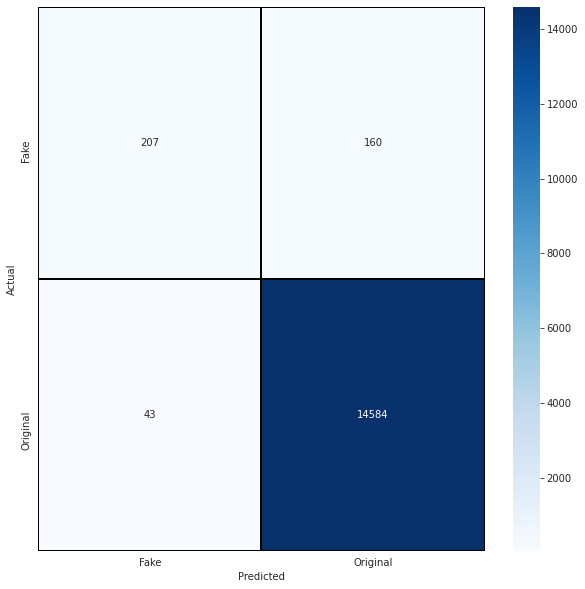

In [76]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','Original'] , yticklabels = ['Fake','Original'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

CNN(1 Layer)+BiLSTM(2 Layers)

In [77]:
from sklearn.utils import class_weight

In [78]:
modelv2 = Sequential()
modelv2.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
modelv2.add(Conv1D(filters = 32,kernel_regularizer=l2(CREG), 
              kernel_size=(3), 
              padding= "same", 
              strides=1,activation='relu'))
modelv2.add( MaxPooling1D(pool_size=5))
modelv2.add(Dropout(rate=CDROP_RATE))
modelv2.add(Bidirectional(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25)))
modelv2.add(Bidirectional(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.25)))
modelv2.add(Dense(units = 32 , activation = 'relu'))
modelv2.add(Dense(1, activation='sigmoid'))
modelv2.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [79]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 10),
             ModelCheckpoint(filepath = 'best_model.h5', monitor= 'val_loss', save_best_only = True)]

In [80]:
history = modelv2.fit(x_train, y_train,
          validation_data = (X_test, y_test),
          epochs = EPOCH,
          verbose = 1,
          callbacks = callbacks,
          batch_size = BATCH_SIZE)

Epoch 1/20
137/137 [==============================] - 320s 2s/step - loss: 0.1663 - accuracy: 0.9343 - val_loss: 0.0953 - val_accuracy: 0.9755
Epoch 2/20
137/137 [==============================] - 306s 2s/step - loss: 0.0942 - accuracy: 0.9743 - val_loss: 0.0681 - val_accuracy: 0.9823
Epoch 3/20
137/137 [==============================] - 306s 2s/step - loss: 0.0704 - accuracy: 0.9816 - val_loss: 0.0649 - val_accuracy: 0.9828
Epoch 4/20
137/137 [==============================] - 304s 2s/step - loss: 0.0649 - accuracy: 0.9819 - val_loss: 0.0596 - val_accuracy: 0.9845
Epoch 5/20
137/137 [==============================] - 306s 2s/step - loss: 0.0603 - accuracy: 0.9846 - val_loss: 0.0677 - val_accuracy: 0.9763
Epoch 6/20
137/137 [==============================] - 307s 2s/step - loss: 0.0564 - accuracy: 0.9862 - val_loss: 0.0614 - val_accuracy: 0.9867
Epoch 7/20
137/137 [==============================] - 308s 2s/step - loss: 0.0520 - accuracy: 0.9892 - val_loss: 0.0631 - val_accuracy: 0.9868

In [81]:
print("Accuracy of the model on Training Data is - " , modelv2.evaluate(x_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , modelv2.evaluate(X_test,y_test)[1]*100 , "%")

1094/1094 [==============================] - 74s 67ms/step - loss: 0.0425 - accuracy: 0.9921
Accuracy of the model on Training Data is -  99.21104311943054 %
469/469 [==============================] - 32s 68ms/step - loss: 0.0884 - accuracy: 0.9851
Accuracy of the model on Testing Data is -  98.51273894309998 %


In [82]:
pred = modelv2.predict_classes(X_test)
pred[:5]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0],
       [0],
       [1],
       [1],
       [1]], dtype=int32)

In [83]:
print(classification_report(y_test, pred, target_names = ['Fake','Not Fake']))

              precision    recall  f1-score   support

        Fake       0.93      0.42      0.58       367
    Not Fake       0.99      1.00      0.99     14627

    accuracy                           0.99     14994
   macro avg       0.96      0.71      0.79     14994
weighted avg       0.98      0.99      0.98     14994



In [84]:
cm = confusion_matrix(y_test,pred)
cm

array([[  155,   212],
       [   11, 14616]])

In [85]:
cm = pd.DataFrame(cm , index = ['Fake','Original'] , columns = ['Fake','Original'])

Text(69.0, 0.5, 'Actual')

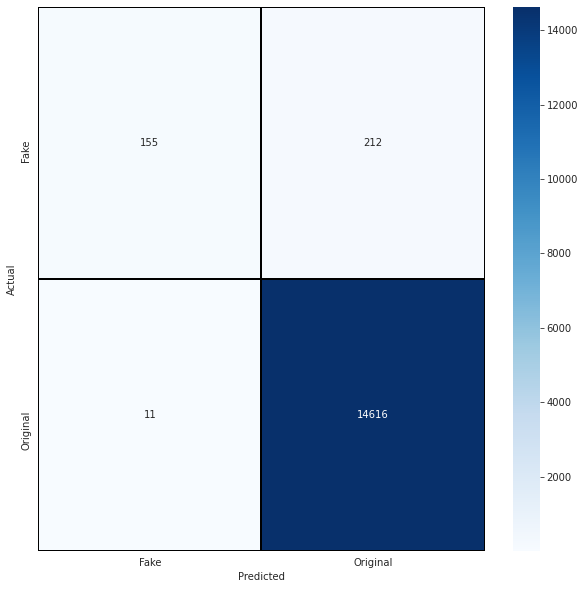

In [86]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','Original'] , yticklabels = ['Fake','Original'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

(With 3 Filters) Cnn+Pooling+Dropout+Cnn+Pool+Dropout+2BiLstm

In [87]:
modelv3 = Sequential()
modelv3.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
modelv3.add(Conv1D(filters = 4,kernel_regularizer=l2(CREG), 
              kernel_size=(3), 
              padding= "same", 
              strides=1,activation='relu'))
modelv3.add( MaxPooling1D(pool_size=5))
modelv3.add(Dropout(rate=CDROP_RATE))
modelv3.add(Conv1D(filters = 8,kernel_regularizer=l2(CREG), 
              kernel_size=(5), 
              padding= "valid", 
              strides=1,activation='relu'))
modelv3.add( MaxPooling1D(pool_size=5))
modelv3.add(Dropout(rate=CDROP_RATE))
modelv3.add(Bidirectional(LSTM(units=64 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25)))
modelv3.add(Bidirectional(LSTM(units=32 , recurrent_dropout = 0.1 , dropout = 0.25)))
modelv3.add(Dense(units = 32 , activation = 'relu'))
modelv3.add(Dense(1, activation='sigmoid'))
modelv3.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [88]:
modelv3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 300, 300)          3000000   
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 300, 4)            3604      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 60, 4)             0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 4)             0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 56, 8)             168       
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 11, 8)             0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 11, 8)            

In [89]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 10),
             ModelCheckpoint(filepath = 'best_model.h5', monitor= 'val_loss', save_best_only = True)]

In [90]:
history = modelv3.fit(x_train, y_train,
          validation_data = (X_test, y_test),
          epochs = 10,
          verbose = 1,
          callbacks = callbacks,
          batch_size = BATCH_SIZE)

Epoch 1/10
137/137 [==============================] - 75s 479ms/step - loss: 0.1555 - accuracy: 0.9635 - val_loss: 0.0808 - val_accuracy: 0.9755
Epoch 2/10
137/137 [==============================] - 64s 467ms/step - loss: 0.0931 - accuracy: 0.9734 - val_loss: 0.0744 - val_accuracy: 0.9755
Epoch 3/10
137/137 [==============================] - 64s 467ms/step - loss: 0.0861 - accuracy: 0.9722 - val_loss: 0.0695 - val_accuracy: 0.9755
Epoch 4/10
137/137 [==============================] - 64s 468ms/step - loss: 0.0790 - accuracy: 0.9734 - val_loss: 0.0667 - val_accuracy: 0.9755
Epoch 5/10
137/137 [==============================] - 64s 466ms/step - loss: 0.0727 - accuracy: 0.9753 - val_loss: 0.0635 - val_accuracy: 0.9787
Epoch 6/10
137/137 [==============================] - 64s 466ms/step - loss: 0.0724 - accuracy: 0.9757 - val_loss: 0.0721 - val_accuracy: 0.9798
Epoch 7/10
137/137 [==============================] - 64s 469ms/step - loss: 0.0723 - accuracy: 0.9777 - val_loss: 0.0670 - val_ac

In [91]:
print("Accuracy of the model on Training Data is - " , modelv3.evaluate(x_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , modelv3.evaluate(X_test,y_test)[1]*100 , "%")

1094/1094 [==============================] - 20s 18ms/step - loss: 0.0550 - accuracy: 0.9826
Accuracy of the model on Training Data is -  98.25629591941833 %
469/469 [==============================] - 9s 18ms/step - loss: 0.0633 - accuracy: 0.9807
Accuracy of the model on Testing Data is -  98.0725646018982 %


In [92]:
pred = modelv3.predict_classes(X_test)
pred[:5]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0],
       [1],
       [1],
       [1],
       [1]], dtype=int32)

In [93]:
print(classification_report(y_test, pred, target_names = ['Fake','Not Fake']))

              precision    recall  f1-score   support

        Fake       0.84      0.26      0.40       367
    Not Fake       0.98      1.00      0.99     14627

    accuracy                           0.98     14994
   macro avg       0.91      0.63      0.69     14994
weighted avg       0.98      0.98      0.98     14994



In [94]:
cm = confusion_matrix(y_test,pred)
cm

array([[   96,   271],
       [   18, 14609]])

In [95]:
cm = pd.DataFrame(cm , index = ['Fake','Original'] , columns = ['Fake','Original'])

Text(69.0, 0.5, 'Actual')

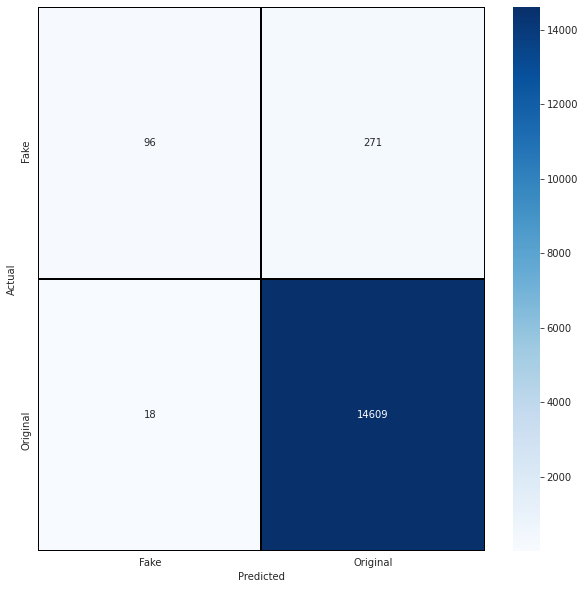

In [96]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','Original'] , yticklabels = ['Fake','Original'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

CNN+ LSTM

In [97]:
modelv4 = Sequential()
modelv4.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
modelv4.add(Conv1D(filters = 32,kernel_regularizer=l2(CREG), 
              kernel_size=(3), 
              padding= "same", 
              strides=1,activation='relu'))
modelv4.add( MaxPooling1D(pool_size=5))
modelv4.add(Dropout(rate=CDROP_RATE))
modelv4.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
modelv4.add(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.25))
modelv4.add(Dense(units = 32 , activation = 'relu'))
modelv4.add(Dense(1, activation='sigmoid'))
modelv4.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [98]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 10),
             ModelCheckpoint(filepath = 'best_model.h5', monitor= 'val_loss', save_best_only = True)]

In [99]:
history = modelv4.fit(x_train, y_train,
          validation_data = (X_test, y_test),
          epochs = EPOCH,
          verbose = 1,
          callbacks = callbacks,
          batch_size = BATCH_SIZE)

Epoch 1/20
137/137 [==============================] - 158s 1s/step - loss: 0.1508 - accuracy: 0.9469 - val_loss: 0.1319 - val_accuracy: 0.9755
Epoch 2/20
137/137 [==============================] - 153s 1s/step - loss: 0.1039 - accuracy: 0.9731 - val_loss: 0.0764 - val_accuracy: 0.9813
Epoch 3/20
137/137 [==============================] - 152s 1s/step - loss: 0.0785 - accuracy: 0.9782 - val_loss: 0.0665 - val_accuracy: 0.9831
Epoch 4/20
137/137 [==============================] - 153s 1s/step - loss: 0.0686 - accuracy: 0.9809 - val_loss: 0.0692 - val_accuracy: 0.9819
Epoch 5/20
137/137 [==============================] - 153s 1s/step - loss: 0.0632 - accuracy: 0.9836 - val_loss: 0.0606 - val_accuracy: 0.9846
Epoch 6/20
137/137 [==============================] - 153s 1s/step - loss: 0.0697 - accuracy: 0.9829 - val_loss: 0.0699 - val_accuracy: 0.9848
Epoch 7/20
137/137 [==============================] - 153s 1s/step - loss: 0.0608 - accuracy: 0.9857 - val_loss: 0.0639 - val_accuracy: 0.9846

In [100]:
print("Accuracy of the model on Training Data is - " , modelv4.evaluate(x_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , modelv4.evaluate(X_test,y_test)[1]*100 , "%")

1094/1094 [==============================] - 41s 38ms/step - loss: 0.0423 - accuracy: 0.9939
Accuracy of the model on Training Data is -  99.39113259315491 %
469/469 [==============================] - 18s 38ms/step - loss: 0.0723 - accuracy: 0.9877
Accuracy of the model on Testing Data is -  98.76617193222046 %


In [101]:
pred = modelv4.predict_classes(X_test)
pred[:5]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0],
       [0],
       [1],
       [1],
       [1]], dtype=int32)

In [102]:
print(classification_report(y_test, pred, target_names = ['Fake','Not Fake']))

              precision    recall  f1-score   support

        Fake       0.92      0.54      0.68       367
    Not Fake       0.99      1.00      0.99     14627

    accuracy                           0.99     14994
   macro avg       0.95      0.77      0.84     14994
weighted avg       0.99      0.99      0.99     14994



In [103]:
cm = confusion_matrix(y_test,pred)
cm

array([[  200,   167],
       [   18, 14609]])

In [104]:
cm = pd.DataFrame(cm , index = ['Fake','Original'] , columns = ['Fake','Original'])

Text(69.0, 0.5, 'Actual')

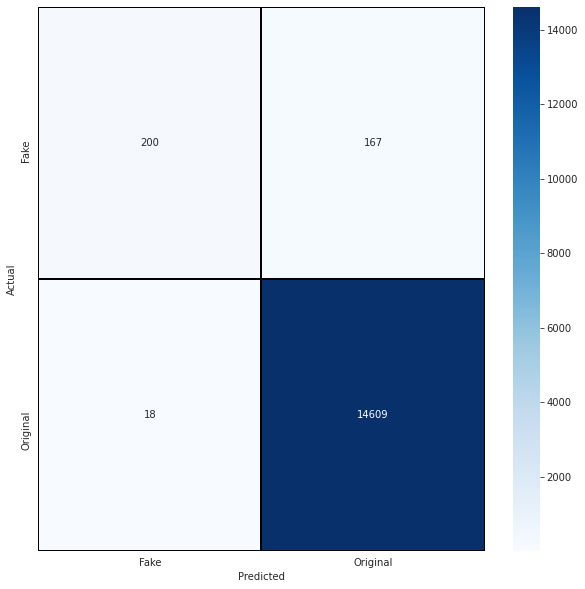

In [105]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','Original'] , yticklabels = ['Fake','Original'])
plt.xlabel("Predicted")
plt.ylabel("Actual")